In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [6]:
raw_data = pd.read_csv('/content/datasets/Kakao.csv')
print(raw_data.head())

         Date     Open     High      Low    Close     Adj Close     Volume
0  2000-02-11  54600.0  54600.0  54600.0  54600.0  51524.144531   276500.0
1  2000-02-14  52800.0  59600.0  48100.0  49400.0  46617.078125  6270500.0
2  2000-02-15  50000.0  51800.0  43500.0  43500.0  41049.457031  3243000.0
3  2000-02-16  42000.0  48700.0  40000.0  48700.0  45956.519531  4357000.0
4  2000-02-17  49200.0  53500.0  47000.0  48700.0  45956.519531  5099000.0


In [7]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())

               Open     High      Low    Close     Adj Close     Volume
Date                                                                   
2000-02-11  54600.0  54600.0  54600.0  54600.0  51524.144531   276500.0
2000-02-14  52800.0  59600.0  48100.0  49400.0  46617.078125  6270500.0
2000-02-15  50000.0  51800.0  43500.0  43500.0  41049.457031  3243000.0
2000-02-16  42000.0  48700.0  40000.0  48700.0  45956.519531  4357000.0
2000-02-17  49200.0  53500.0  47000.0  48700.0  45956.519531  5099000.0


In [33]:
#필요 날짜행만 추출
data = raw_data['2019-06-15':'2021-06-14'][['Open', 'High', 'Low', 'Close', 'Volume']]
print(data.tail())
print(data.info())
print(data.shape)

                Open      High       Low     Close     Volume
Date                                                         
2021-06-08  127000.0  128500.0  126500.0  128500.0  2248373.0
2021-06-09  128500.0  130000.0  128500.0  129000.0  1936747.0
2021-06-10  130000.0  135000.0  129500.0  133500.0  5564011.0
2021-06-11  134500.0  136500.0  132000.0  135500.0  3674400.0
2021-06-14  136000.0  143000.0  136000.0  142500.0  6192633.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2019-06-17 to 2021-06-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    493 non-null    float64
 1   High    493 non-null    float64
 2   Low     493 non-null    float64
 3   Close   493 non-null    float64
 4   Volume  493 non-null    float64
dtypes: float64(5)
memory usage: 23.2 KB
None
(494, 5)


In [9]:
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 2019-06-17 to 2021-06-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    493 non-null    float64
 1   High    493 non-null    float64
 2   Low     493 non-null    float64
 3   Close   493 non-null    float64
 4   Volume  493 non-null    float64
dtypes: float64(5)
memory usage: 23.1 KB
None


In [53]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data)
print(scaled_data[:5])
print(scaled_data.shape)
print(scaled_data[-5:])

[[0.01157614 0.00421941 0.00622222 0.00084531 0.10215066]
 [0.00534283 0.00084388 0.00444444 0.         0.10052781]
 [0.00712378 0.         0.00622222 0.00169062 0.0522696 ]
 [0.0062333  0.00253165 0.00444444 0.00169062 0.08412321]
 [0.01068566 0.0092827  0.01155556 0.00929839 0.23617362]]
(494, 5)
[[0.91985752 0.87763713 0.91555556 0.8816568  0.13136845]
 [0.9332146  0.89029536 0.93333333 0.88588335 0.1131607 ]
 [0.94657168 0.93248945 0.94222222 0.92392223 0.3250953 ]
 [0.98664292 0.94514768 0.96444444 0.9408284  0.21468868]
 [1.         1.         1.         1.         0.36182457]]


In [11]:
# 각 길이가 28인 시퀀스로 만듦
sequence_X = []
sequence_Y = []
for i in range(len(scaled_data) - 28):
    _x = scaled_data[i:i+28] # i ~ i+27번째 feature은
    _y = scaled_data[i+28][3] # i+28번째가 label
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.01157614 0.00421941 0.00622222 0.00084531 0.10215066]
 [0.00534283 0.00084388 0.00444444 0.         0.10052781]
 [0.00712378 0.         0.00622222 0.00169062 0.0522696 ]
 [0.0062333  0.00253165 0.00444444 0.00169062 0.08412321]
 [0.01068566 0.0092827  0.01155556 0.00929839 0.23617362]
 [0.01513802 0.0092827  0.01422222 0.00845309 0.08949247]
 [0.01869991 0.01434599 0.01777778 0.01606086 0.27954957]
 [0.0222618  0.01687764 0.02044444 0.01437025 0.15077317]
 [0.0222618  0.0185654  0.02222222 0.01775148 0.20571381]
 [0.02315227 0.01772152 0.02222222 0.01775148 0.10585851]
 [0.02493321 0.01772152 0.02044444 0.01437025 0.12671184]
 [0.01959038 0.01518987 0.01866667 0.01775148 0.07726783]
 [0.02315227 0.01603376 0.02222222 0.01690617 0.0878372 ]
 [0.0222618  0.01687764 0.02133333 0.0194421  0.10594031]
 [0.02582369 0.01940928 0.02488889 0.02113271 0.13392247]
 [0.02671416 0.0185654  0.01866667 0.01183432 0.169734  ]
 [0.01780944 0.01603376 0.01866667 0.01690617 0.13544832]
 [0.02404274 0

In [12]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.01157614 0.00421941 0.00622222 0.00084531 0.10215066]
 [0.00534283 0.00084388 0.00444444 0.         0.10052781]
 [0.00712378 0.         0.00622222 0.00169062 0.0522696 ]
 [0.0062333  0.00253165 0.00444444 0.00169062 0.08412321]
 [0.01068566 0.0092827  0.01155556 0.00929839 0.23617362]
 [0.01513802 0.0092827  0.01422222 0.00845309 0.08949247]
 [0.01869991 0.01434599 0.01777778 0.01606086 0.27954957]
 [0.0222618  0.01687764 0.02044444 0.01437025 0.15077317]
 [0.0222618  0.0185654  0.02222222 0.01775148 0.20571381]
 [0.02315227 0.01772152 0.02222222 0.01775148 0.10585851]
 [0.02493321 0.01772152 0.02044444 0.01437025 0.12671184]
 [0.01959038 0.01518987 0.01866667 0.01775148 0.07726783]
 [0.02315227 0.01603376 0.02222222 0.01690617 0.0878372 ]
 [0.0222618  0.01687764 0.02133333 0.0194421  0.10594031]
 [0.02582369 0.01940928 0.02488889 0.02113271 0.13392247]
 [0.02671416 0.0185654  0.01866667 0.01183432 0.169734  ]
 [0.01780944 0.01603376 0.01866667 0.01690617 0.13544832]
 [0.02404274 0

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size = 0.2,
    random_state=30)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(372, 28, 5)
(372,)
(93, 28, 5)
(93,)


In [14]:
model = Sequential()
#SimpleRNN, GRU, LSTM
model.add(GRU(50,
    input_shape=(X_train.shape[1], X_train.shape[2]),
     activation='tanh'))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                8550      
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 8,601
Trainable params: 8,601
Non-trainable params: 0
_________________________________________________________________


In [15]:
fit_hist = model.fit(X_train, Y_train, epochs=300,
    validation_data=(X_test, Y_test), shuffle=False)

Epoch 1/300
12/12 [==============================] - 3s 60ms/step - loss: 0.0218 - val_loss: 0.0123
Epoch 2/300
12/12 [==============================] - 0s 18ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 3/300
12/12 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 8.2161e-04
Epoch 4/300
12/12 [==============================] - 0s 20ms/step - loss: 5.8807e-04 - val_loss: 5.8771e-04
Epoch 5/300
12/12 [==============================] - 0s 18ms/step - loss: 4.2285e-04 - val_loss: 4.5390e-04
Epoch 6/300
12/12 [==============================] - 0s 20ms/step - loss: 3.4610e-04 - val_loss: 4.4798e-04
Epoch 7/300
12/12 [==============================] - 0s 18ms/step - loss: 3.2342e-04 - val_loss: 4.3566e-04
Epoch 8/300
12/12 [==============================] - 0s 17ms/step - loss: 3.1667e-04 - val_loss: 4.2942e-04
Epoch 9/300
12/12 [==============================] - 0s 18ms/step - loss: 3.0887e-04 - val_loss: 4.2107e-04
Epoch 10/300
12/12 [============================

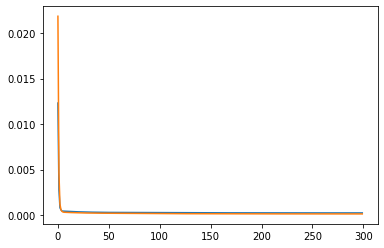

In [16]:
plt.plot(fit_hist.history['val_loss'])
plt.plot(fit_hist.history['loss'])
plt.show()

In [17]:
predict = model.predict(X_test)

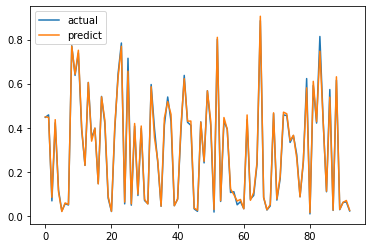

In [18]:
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [19]:
test_data = raw_data['2021-04-15':'2021-06-14'][['Open', 'High', 'Low', 'Close', 'Volume']]
print(test_data.head())
print(test_data.info())
print(test_data.shape)

                Open      High       Low     Close      Volume
Date                                                          
2021-04-15  120500.0  132500.0  118000.0  120500.0  17115015.0
2021-04-16  115500.0  120500.0  115500.0  119000.0  13709555.0
2021-04-19  120000.0  122000.0  117500.0  119000.0   5441693.0
2021-04-20  119000.0  121000.0  118000.0  119500.0   2952174.0
2021-04-21  119500.0  119500.0  117000.0  118000.0   4461636.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2021-04-15 to 2021-06-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    41 non-null     float64
 1   High    41 non-null     float64
 2   Low     41 non-null     float64
 3   Close   41 non-null     float64
 4   Volume  41 non-null     float64
dtypes: float64(5)
memory usage: 1.9 KB
None
(41, 5)


In [20]:
scaled_test_data = minmaxscaler.transform(test_data)
print(scaled_test_data[-5:])
print(scaled_test_data.shape)

[[0.91985752 0.87763713 0.91555556 0.8816568  0.13136845]
 [0.9332146  0.89029536 0.93333333 0.88588335 0.1131607 ]
 [0.94657168 0.93248945 0.94222222 0.92392223 0.3250953 ]
 [0.98664292 0.94514768 0.96444444 0.9408284  0.21468868]
 [1.         1.         1.         1.         0.36182457]]
(41, 5)


In [34]:
scaled_test_data[40][3]

1.0

In [35]:
original_value = minmaxscaler.inverse_transform(scaled_test_data[40].reshape(-1,5))
print(original_value)

[[ 136000.  143000.  136000.  142500. 6192633.]]


In [36]:
print(test_data.iloc[40])

Open       136000.0
High       143000.0
Low        136000.0
Close      142500.0
Volume    6192633.0
Name: 2021-06-14 00:00:00, dtype: float64


In [46]:
sequence_testdata_X = []
sequence_testdata_Y = []
for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i:i+28] 
    _y = scaled_test_data[i+28][3] 
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)

In [47]:
predict = model.predict(sequence_testdata_X)

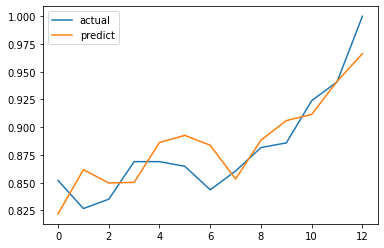

In [48]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [49]:
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [50]:
last_28_data = last_28_data.reshape(-1,28,5)
last_28_data.shape

(1, 28, 5)

In [51]:
today_close = model.predict(last_28_data)
print(today_close)

[[1.0204813]]


In [52]:
minmaxscaler_close = MinMaxScaler()
_ = minmaxscaler_close.fit_transform(data[['Close']]) # 데이터를 받을 필요없으니 _사용
today_close = minmaxscaler_close.inverse_transform(today_close)
print(today_close)

[[144922.95]]
